<a href="https://colab.research.google.com/github/kellycochran/colab_notebooks/blob/master/Matplotlib_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Making Simple Graphs With ```matplotlib```



The best matplotlib documentation is a combination of Stack Overflow and https://matplotlib.org/.

In [0]:
import matplotlib.pyplot as plt
# only include the line below if you're coding in a notebook, not a .py script
%matplotlib inline  

### First, let's get some data!

The data we'll use is from Johns Hopkins. Each line of the file contains a single integer that represents the number of cumulative cases of COVID-19 for one day in Italy. We read in this file and store this data in two lists: one of cumulative cases, and one of only the new cases per day.

In [2]:
!wget https://github.com/kellycochran/colab_notebooks/raw/master/data/italy.txt
DATA_FILEPATH = "italy.txt"

def read_file(filename):
    data = []
    # create a file "handle" to read from
    with open(DATA_FILEPATH) as f:
        # iterate over each line in the file
        for line in f:
            data.append(int(line.strip()))
    return data

def calc_new_cases(data):
    # create new list that stores new cases each day
    # new_cases(day) = cases(day) - cases(day - 1)
    new_cases = [0]
    for i in range(1, len(data)):
        new_cases.append(data[i] - data[i-1])
    return new_cases

# lines of code that would normally go in main()
# this way, cases and new_cases are "global" variables seen across cells
cases = read_file(DATA_FILEPATH)
new_cases = calc_new_cases(cases)

--2020-06-07 22:56:21--  https://github.com/kellycochran/colab_notebooks/raw/master/data/italy.txt
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kellycochran/colab_notebooks/master/data/italy.txt [following]
--2020-06-07 22:56:21--  https://raw.githubusercontent.com/kellycochran/colab_notebooks/master/data/italy.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 546 [text/plain]
Saving to: ‘italy.txt’

italy.txt           100%[===================>]     546  --.-KB/s    in 0s      

2020-06-07 22:56:21 (29.0 MB/s) - ‘italy.txt’ saved [546/546]



### A Simple Scatter Plot

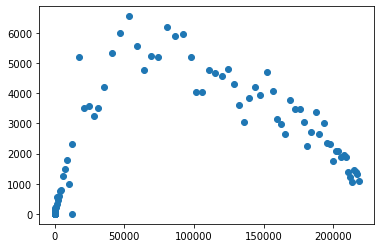

In [3]:
# the most minimal example

# arguments for plt.scatter():
# 1. a list of x-coordinates,
#        with length equal to the number of points to be plotted
# 2. a list of y-coordinates,
#        the same length as the list of x-coordinates
plt.scatter(cases, new_cases)

plt.show()  # displays plot below

# to save the plot instead, do:
# plt.savefig("filename.png", dpi = 300)

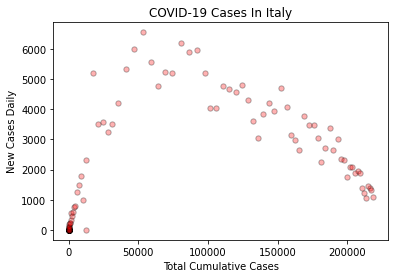

In [4]:
# now let's add some text and minimal style to this plot

# this scatter function takes additional arguments, like:
# s: the size of the dots
# c: the color of the dots, can be just the color name as a string
# alpha: the transparency of the dots, from 1 (100% opaque) to 0 (invisible)
# edgecolors: the color of the edge of the dots
plt.scatter(cases, new_cases, s = 28, c = "r", alpha = 0.3, edgecolors = "k")
plt.title("COVID-19 Cases In Italy")
plt.xlabel("Total Cumulative Cases")
plt.ylabel("New Cases Daily")
plt.show()

In the example above, we used the string "r" as shorthand for "red". Matplotlib actually knows a ton of differnet color names you can use: https://matplotlib.org/3.1.0/gallery/color/named_colors.html

![](https://matplotlib.org/3.1.0/_images/sphx_glr_named_colors_003.png)

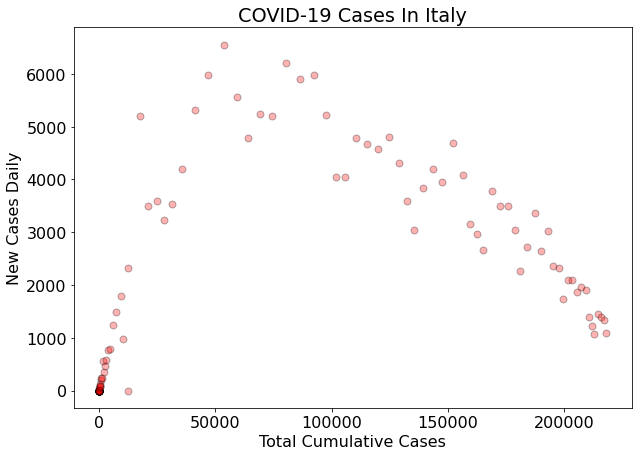

In [5]:
# to modify plot size, you'll need to officially call plt.figure(),
# and pass in a list of 2 numbers to the "figsize" argument
# here, (10, 7) means the plt is 10 units wide, 7 units tall
fig = plt.figure(figsize = [10, 7])

# use this to change font size/family/etc.
# Warning: thi will apply to all future plots until you change it again!
plt.rc("font", size = 16)

# same code as before
plt.scatter(cases, new_cases, s = 48, c = "red", alpha = 0.3, edgecolors = "black")
plt.title("COVID-19 Cases In Italy")
plt.xlabel("Total Cumulative Cases")
plt.ylabel("New Cases Daily")
plt.show()

### Line Plots

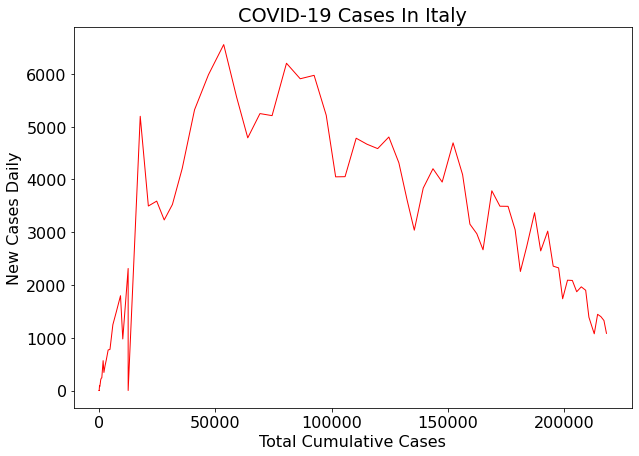

In [6]:
fig = plt.figure(figsize = (10, 7))
plt.rc("font", size = 16)

# same code as before, with one difference: plt.plot() instead of plt.scatter()
# instead of "s" argument for dot size, we can use "linewidth" for line size
plt.plot(cases, new_cases, c = "red", linewidth = 1)
plt.title("COVID-19 Cases In Italy")
plt.xlabel("Total Cumulative Cases")
plt.ylabel("New Cases Daily")
plt.show()

We've been using the number of cases on the x-axis. This doesn't let us see what the data looks like on any given day. What if we want to change the x-axis to be over time (days)?

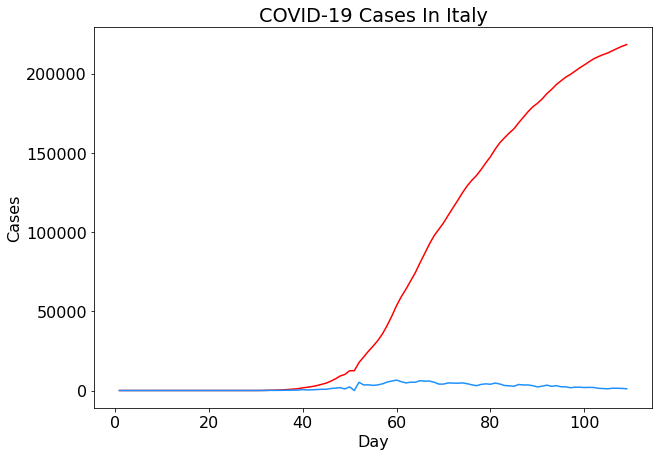

In [7]:
# To plot 2 lines, we just call plot() twice

fig = plt.figure(figsize = (10, 7))
plt.rc("font", size = 16)

days = range(1, len(cases) + 1)
plt.plot(days, cases, c = "red")
plt.plot(days, new_cases, c = "dodgerblue")
plt.title("COVID-19 Cases In Italy")
plt.xlabel("Day")
plt.ylabel("Cases")
plt.show()

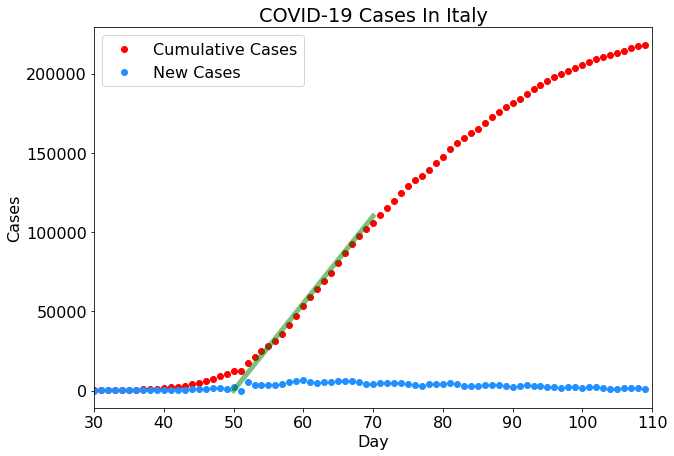

In [8]:
# We only care about the data after day 30 or so...
# ... and it would be nice to have a legend, telling us which line is which.

fig = plt.figure(figsize = (10, 7))
plt.rc("font", size = 16)

days = range(1, len(cases) + 1)
# we use the "label" param to say what we want this to be called in the legend
plt.scatter(days, cases, c = "r", label = "Cumulative Cases")
plt.scatter(days, new_cases, c = "dodgerblue", label = "New Cases")
plt.plot([50, 70], [0, 110000], linewidth = 5, c = "g", alpha = 0.5)
plt.title("COVID-19 Cases In Italy")
plt.xlabel("Day")
plt.ylabel("Cases")
plt.xlim(30, max(days) + 1)  # new line to change x-axis start and end
plt.legend()  # this displays the legend
plt.show()

Similar to how we switched from scatter plots to line plots, you can also make bar plots, box plots, heatmaps, geographical maps, and a lot more! See this gallery here for cool examples of what's possible: https://matplotlib.org/gallery.html

### Thoughts on Plots

1. When you start to create a plot, first just make the most basic version of a plot you can, where you can tell that the data you are using is being correctly displayed.
2. Once you have a minimal prototype of a plot, you can incrementally add features, like text, colors, and other tweaks.
3. No need to try to reinvent the wheel when you're trying to add a new feature to a plot for the first time -- googling, e.g., "matplotlib how to add a legend" is the simplest and fastest way to find the line of code you're looking for.